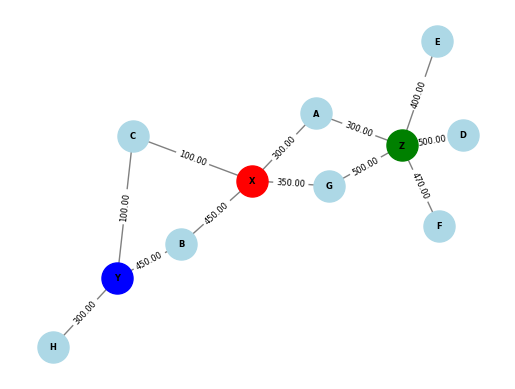

In [66]:
import networkx as nx
import matplotlib.pyplot as plt

#weights = {('A', 'X'): 300, ('B', 'X'): 450, ('B', 'Y'): 450, ('C', 'Y'): 100,
#           ('D', 'Z'): 500, ('E', 'Z'): 400, ('F', 'Z'): 470, ('G', 'X'): 350,
#           ('G', 'Z'): 500, ('H', 'Y'): 300, ('C', 'X'): 100, ('A', 'Z'): 300}


# Create a graph object
G = nx.Graph()

# Add nodes for football clubs
clubs = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
G.add_nodes_from(clubs)

# Add nodes for national teams
teams = ['X', 'Y', 'Z']
G.add_nodes_from(teams)

# Define the weights for the edges
weights = {('A', 'X'): 300, ('B', 'X'): 450, ('B', 'Y'): 450, ('C', 'Y'): 100,
           ('D', 'Z'): 500, ('E', 'Z'): 400, ('F', 'Z'): 470, ('G', 'X'): 350,
           ('G', 'Z'): 500, ('H', 'Y'): 300, ('C', 'X'): 100, ('A', 'Z'): 300}

# Create edges between clubs and national teams with weights
edges = [(club, team, {'weight': weight}) for (club, team), weight in weights.items()]
G.add_edges_from(edges)

# Assign colors to national teams
team_colors = {'X': 'red', 'Y': 'blue', 'Z': 'green'}

# Plot the network graph
pos = nx.spring_layout(G)  # Positions of the nodes

# Draw clubs
nx.draw_networkx_nodes(G, pos, nodelist=clubs, node_color='lightblue', node_size=500)
# Draw national teams with different colors
for team in teams:
    nx.draw_networkx_nodes(G, pos, nodelist=[team], node_color=team_colors[team], node_size=500)

# Draw edges with weights
nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='gray')

# Draw edge labels
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)

nx.draw_networkx_labels(G, pos, font_size=6, font_weight='bold')
#plt.title("Football Clubs and National Teams Network with Centrality Score as Weights")
plt.axis('off')
plt.show()


In [46]:
import networkx as nx
degree_centrality = nx.eigenvector_centrality(G, weight='weight',tol = 1)
for node in ['X', 'Y', 'Z']:
    print(f"Node {node}: {degree_centrality[node]}")

Node X: 0.3485883638615741
Node Y: 0.24820031954019828
Node Z: 0.6059762836895967


In [55]:
import random
node1 = 'Y'
node2 = 'Z'

# perform a random walk from node1
probabilities = {node: 0 for node in G.nodes()}
probabilities[node1] = 1.0
for i in range(1000):
    current_node = node1
    for j in range(100):
        neighbors = list(G.neighbors(current_node))
        if len(neighbors) == 0:
            break
        weights = [G[current_node][neighbor]['weight'] for neighbor in neighbors]
        next_node = random.choices(neighbors, weights=weights)[0]
        probabilities[next_node] += 1.0
        current_node = next_node

# normalize probabilities
total = sum(probabilities.values())
probabilities = {node: prob / total for node, prob in probabilities.items()}

# calculate probability of strength for team A against team B based on eigenvector centrality
strength_prob = probabilities[node1] * degree_centrality[node1] /(probabilities[node1] * degree_centrality[node1]+(probabilities[node2] * degree_centrality[node2]))
print(f"Probability that {node1} is stronger than {node2}: {strength_prob}")
strength_prob1 = probabilities[node2] * degree_centrality[node2] /(probabilities[node1] * degree_centrality[node1]+(probabilities[node2] * degree_centrality[node2]))
print(f"Probability that {node2} is stronger than {node1}: {strength_prob1}")

Probability that Y is stronger than Z: 0.12013605673952675
Probability that Z is stronger than Y: 0.8798639432604732
